<img style="float: right;" src="http://www2.le.ac.uk/liscb1.jpg">  
# Leicester Institute of Structural and Chemical Biology: Python for Biochemists
# Kernel Density Estimation

Kernel Density Esimation (kde) can be used to produce a smoothed 'distribution' like curve from a set of counting data.  There are may situations where the kde can be useful, most commonly to assist with visualization of data.

Although sometimes refered to as 'paramater free', the kde in-fact has several parameters.  The first (and often most important,) is which kernel to choose - which often leads directly to the question:  
> *What is a kernel?*  

Once that question is addressed, the rest of the parameters become clear - so lets address that first. 

## What is the 'Kernel' in kde?
The kernel is the thing that gets summed up to make the density estimate.  Code makes this clearer, so lets start with some imports and plotting a Gaussian.

In [1]:
import numpy as np
from scipy.stats import norm  # Normal (Gaussian) distribution
from matplotlib import pyplot as plt
%matplotlib inline

x = np.linspace(-10,10,1000)

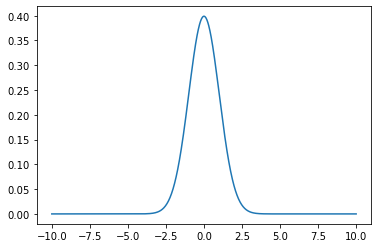

In [2]:
gaussian_0_1 = norm.pdf(x, loc=0, scale=1)  # .pdf give us the probability density function.

plt.plot(x, gaussian_0_1);

And now we need some data:

In [3]:
one_observation = [5]
two_observations = [5, 1]
three_observations = [5, 1, 5]

Now we have enough to plot the KDE:

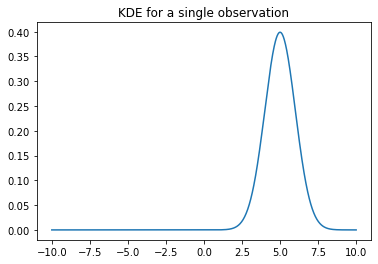

In [4]:
kde_one_observation = norm.pdf(x, loc=one_observation[0], scale=1)
plt.plot(x, kde_one_observation);
plt.title('KDE for a single observation');

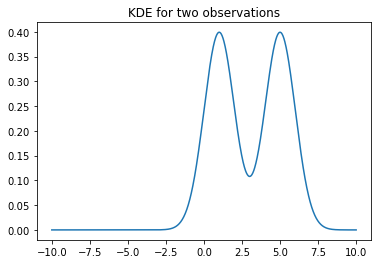

In [5]:
kde_two_observations = norm.pdf(x, loc=two_observations[0], scale=1) + norm.pdf(x, loc=two_observations[1], scale=1)
plt.plot(x, kde_two_observations);
plt.title('KDE for two observations');

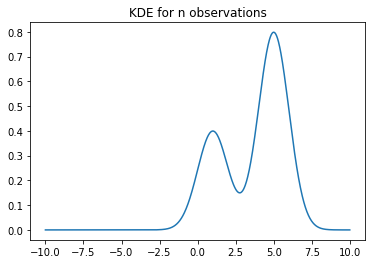

In [6]:
kde_n_observations = np.zeros_like(x)
for obs in three_observations:
    kde_n_observations += norm.pdf(x, loc=obs, scale=1) 

plt.plot(x, kde_n_observations);
plt.title('KDE for n observations');

So the kernel is just the thing we center on our observation and add together for each observation.  Notice how the kernel defines the remaining parameter (in this case, just the scale):

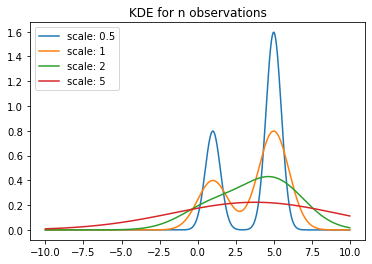

In [7]:
for scale in [0.5, 1, 2, 5]:
    kde_n_observations = np.zeros_like(x)
    for obs in three_observations:
        kde_n_observations += norm.pdf(x, loc=obs, scale=scale) 

    plt.plot(x, kde_n_observations, label=f'scale: {scale}');

plt.legend()
plt.title('KDE for n observations');

You can use whatever kernel you like, but Gaussian is the most common choice.  There are even tricks to try to guess, from your data, what scale parameter you should use.  Because this is just the sum of curves, 2D, 3D and nD KDEs are possible (and common.)  If you want to make a KDE for real, rather than coding it up yourself, just use the `scipy` version.  It's much faster than the simple code above, it'll do a pretty good job of guessing the right 'bandwidth' (similar to scale), and you could even draw samples from it if you wanted (check the docs):

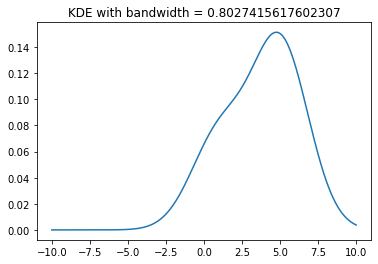

In [8]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(three_observations)

plt.plot(x, kde.pdf(x))
plt.title(f'KDE with bandwidth = {kde.factor}');